In [1]:
from scipy.special import erf
import numpy as np
%matplotlib inline
from cmath import pi
import math
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
def opt_func(n, delta, q, Pc):
    rel = delta/(1-delta)/(q-1)
    log_rel = np.log([rel])/np.log([q])
    beta = 2*n*Pc*(1-Pc)
    alfa = n*delta-1-n*Pc
    return log_rel*np.sqrt([pi])/2*np.sqrt([beta])*(erf(alfa/np.sqrt([beta]))+1)+n*(np.log([q*(1-delta)])/np.log([q])+delta*log_rel)*math.exp(-alfa**2/beta)

In [3]:
def Pc_psi(psi):
    return 1-math.exp(-psi)

In [4]:
def Pc(U,S):
    return 1-(1-1/1./S)**(U-1)

In [5]:
def sumrate(n, delta, q, psi, rvg):
    Pc = Pc_psi(psi)
    rel = delta/(1-delta)/(q-1)
    log_rel = np.log([rel])/np.log([q])
    beta = 2*n*Pc*(1-Pc)
    alfa = n*delta-n*Pc
    return psi*rvg/2*(erf(alfa/np.sqrt([beta]))+1)

In [6]:
def sumrate_(n, delta, U, L, Q, rvg, Pc):
    q = 2**L
    rel = delta/(1-delta)/(q-1)
    log_rel = np.log([rel])/np.log([q])
    beta = 2*n*Pc*(1-Pc)
    alfa = n*delta-n*Pc
    return U*L/Q*rvg/2.*(erf(alfa/np.sqrt([beta]))+1)

In [7]:
def Binc(bcs,n,k):
    if (k>n):   return 0
    if k>n//2:  k=n-k
    if k==0:    return 1
    if k==1:    return n
    while len(bcs)<n-3:
        # заполняем выше
        for i in range(len(bcs),n-3):
            r=[]
            for j in range(2,i//2+3):
                r.append(Binc(bcs,i+3,j-1)+Binc(bcs,i+3,j))
            bcs.append(r)
    r=bcs[n-4]
    if len(r)<k-1:
        # заполняем левее
        for i in range(len(r),k-1):
            r.append(Binc(bcs,n-1,k-1)+Binc(bcs,n-1,k))
    return bcs[n-4][k-2]

In [8]:
bcs = []

In [9]:
def RVG(delta,q):
    rel = delta/(1-delta)/(q-1)
    log_rel = np.log([rel])/np.log([q])
    return np.log([q*(1-delta)])/np.log([q])+delta*log_rel

In [10]:
def sumrate2(n, delta, q, psi, rvg):
    pcorr_log = 0
    pcorr = 0
    pc  = Pc_psi(psi)
    
    d = math.ceil(delta*n)
    
    for i in range(0,int(d)):
        pcorr_log = 1
        for j in range(1, i+1):
            pcorr_log = pcorr_log*(n-j+1)/j*pc
        pcorr_log = pcorr_log*(1-pc)**(n-i)
        
        pcorr = pcorr + pcorr_log
    #print(psi,rvg,pcorr)
    return psi*rvg*pcorr

In [11]:
def sumrate2_(n, delta, U, L, Q, rvg):
    pcorr_log = 0
    pcorr = 0
    
    pc  = Pc(U,Q/L)
    
    d = math.ceil(delta*n)
    
    for i in range(0,int(d)):
        pcorr_log = 1
        for j in range(1, i+1):
            pcorr_log = pcorr_log*(n-j+1)/j*pc
        pcorr_log = pcorr_log*(1-pc)**(n-i)
        
        pcorr = pcorr + pcorr_log
    #print(psi,rvg,pcorr)
    return U*L/Q*rvg*pcorr

In [12]:
delta = np.linspace(0.4, 0.999,  200)
U = 1200.0
S = 1000.0
n = 1000.0
pc = Pc_psi(U/S)
q = 2.0**16
y7_1=[]
y7_2 = []
y7 = []
for i in delta:
    y7_1.append(sumrate2(n,i,q,U/S, RVG(i,q)))
    y7.append(opt_func(n,i,q,pc)/1800.)
    y7_2.append(sumrate(n,i,q,U/S, RVG(i,q)))

In [13]:
font = {'size'   : 16}

plt.rc('font', **font)

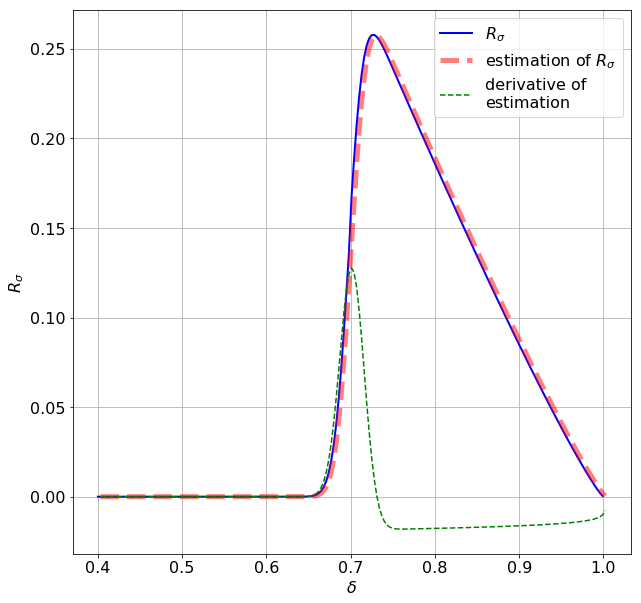

In [14]:
plt.figure(figsize=(10,10))
plt.plot(delta, y7_1, 'b',label = '$R_{\sigma}$', lw=2)
plt.plot(delta+3e-3, y7_2,'r--', label = 'estimation of $R_\sigma$', lw=5, alpha=.5)
plt.plot(delta+3e-3, y7, 'g--', label = 'derivative of\nestimation')
plt.grid()
plt.xlabel('$\delta$')
plt.ylabel('$R_\sigma$')
plt.legend()
plt.show()

In [57]:
y[:]

[[array([3.08541642e-30]), 0.3],
 [array([1.9469978e-27]), 0.3],
 [array([5.98020441e-24]), 0.3],
 [array([6.05589106e-22]), 0.3],
 [array([2.79378348e-19]), 0.3],
 [array([1.07686784e-17]), 0.3],
 [array([1.51638821e-15]), 0.3],
 [array([2.99155828e-14]), 0.3],
 [array([1.7541987e-12]), 0.3],
 [array([2.06177375e-11]), 0.3],
 [array([6.00240136e-10]), 0.3],
 [array([4.61195233e-09]), 0.3],
 [array([7.46926518e-08]), 0.3],
 [array([3.99578375e-07]), 0.3],
 [array([3.90097723e-06]), 0.3],
 [array([1.52151833e-05]), 0.3],
 [array([9.51404599e-05]), 0.3],
 [array([0.00028045]), 0.3],
 [array([0.00117947]), 0.3],
 [array([0.00270773]), 0.3],
 [array([0.00566784]), 0.3],
 [array([0.01468196]), 0.3],
 [array([0.02486308]), 0.3],
 [array([0.04786306]), 0.3],
 [array([0.06747849]), 0.3],
 [array([0.10109787]), 0.3],
 [array([0.1227238]), 0.3],
 [array([0.1513172]), 0.3],
 [array([0.16474907]), 0.3],
 [array([0.17844804]), 0.3],
 [array([0.18215514]), 0.3],
 [array([0.18739301]), 0.327272727272

In [71]:
UkS = np.linspace(0.1,3, 100)
n = 1000
L = 16.
q = 2**L
y = []
Rsig1 = []
p = 0.5
for delta in np.linspace(0.01, 0.99, 100):
    pc = Pc_psi(u)
    y1 = []
    rvg = RVG(delta, q)
    for u in UkS:
        y1.append([sumrate2(n,delta,q,u,rvg),u])
    a, b = findmax(y1, 99)
    y.append([a,b])
for i in UkS:
    Rsig1.append(i*C(i,p))

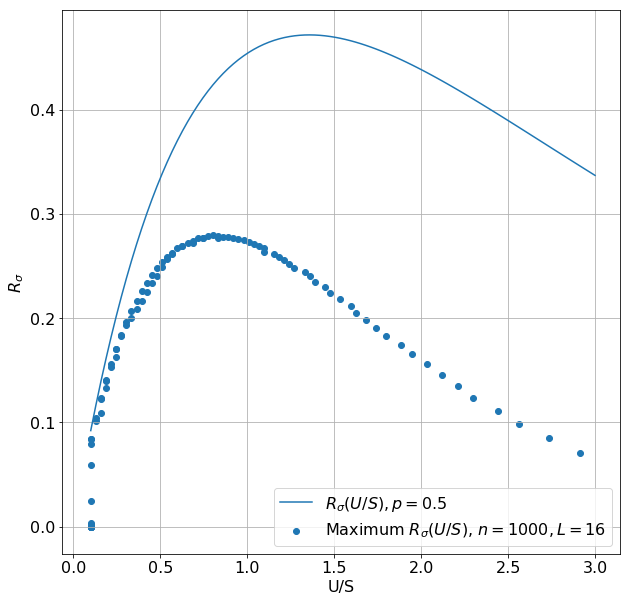

In [73]:
nmp = np.array(y)
plt.figure(figsize=(10,10))
plt.plot(UkS,Rsig1, label = '$R_\sigma(U/S), p=0.5$')
plt.scatter(nmp[:,1], nmp[:,0], label = 'Maximum $R_\sigma(U/S)$, $n = 1000, L = 16$')
plt.xlabel('U/S')
plt.ylabel('$R_\sigma$')
plt.grid()
plt.legend()

In [15]:
UkS = np.linspace(0.2,3, 200)

L = 16.
dlt1 = 0.3
dlt2 = 0.4
dlt3 = 0.5
dlt4 = 0.6
dlt5 = 0.7
dlt6 = 0.8
yot1 = []
yot2 = []
yot3 = []
yot4 = []
yot5 = []
yot6 = []
q = 2**L
n = 1000
rvg1 = RVG(dlt1,q)
rvg2 = RVG(dlt2,q)
rvg3 = RVG(dlt3,q)
rvg4 = RVG(dlt4,q)
rvg5 = RVG(dlt5,q)
rvg6 = RVG(dlt6,q)
for i in UkS:
    yot1.append(sumrate2(n,dlt1, q,i, rvg1))
    yot2.append(sumrate2(n,dlt2, q,i, rvg2))
    yot3.append(sumrate2(n,dlt3, q,i, rvg3))
    yot4.append(sumrate2(n,dlt4, q,i, rvg4))
    yot5.append(sumrate2(n,dlt5, q,i, rvg5))
    yot6.append(sumrate2(n,dlt6, q,i, rvg6))


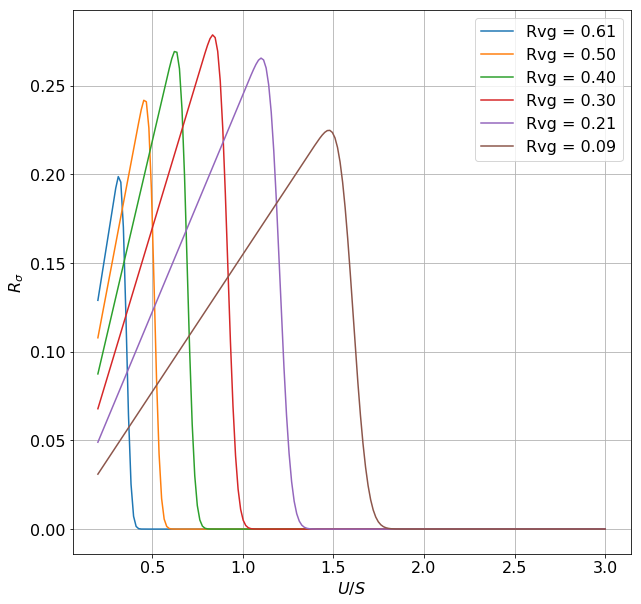

In [16]:
plt.figure(figsize=(10,10))
plt.plot(UkS, yot1, label = 'Rvg = 0.61')
plt.plot(UkS, yot2, label = 'Rvg = 0.50')
plt.plot(UkS, yot3, label = 'Rvg = 0.40')
plt.plot(UkS, yot4, label = 'Rvg = 0.30')
plt.plot(UkS, yot5, label = 'Rvg = 0.21')
plt.plot(UkS, yot6, label = 'Rvg = 0.09')
plt.grid()
plt.xlabel('$U/S$')
plt.ylabel('$R_\sigma$')
plt.legend()
plt.show()

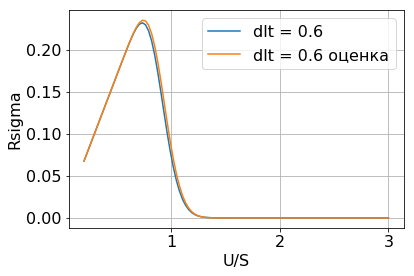

In [17]:
UkS = np.linspace(0.2,3, 100)
S = 500.
U = S*UkS
L = 16.
dlt1 = 0.6
yot1 = []
yot2 = []
yot3 = []
yot4 = []
yot5 = []
yot6 = []
q = 2**L
n = 100
rvg1 = RVG(dlt1,q)
for i in UkS:
    yot1.append(sumrate2(n,dlt1, q,i, rvg1))
    yot2.append(sumrate(n,dlt1,q,i, rvg1))
    
plt.plot(UkS, yot1, label = 'dlt = 0.6')
plt.plot(UkS, yot2, label = u'dlt = 0.6 оценка')

plt.grid()
plt.xlabel('U/S')
plt.ylabel('Rsigma')
plt.legend()
plt.show()

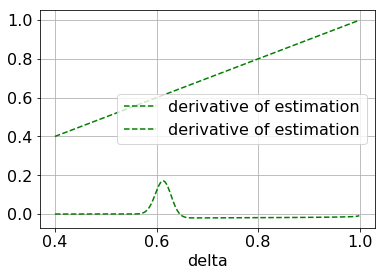

In [18]:
delta = np.linspace(0.4, 0.999,  200)
U = 950.0
S = 1000.0
n = 1000.0
pc = Pc_psi(U/S)
q = 2.0**16

y7_0 = []
k=0
for i in delta:
    y7_0.append([opt_func(n,i,q,pc)[0]/1800., i])
    
    
plt.plot(delta, y7_0, 'g--', label = 'derivative of estimation')
plt.grid()
plt.xlabel('delta')
plt.legend()
plt.show()

In [19]:
def find0(y,n):
    a1 = 0
    a2 = 0
    for i in range(0,n):
        if y[i][0]>0:
            a1 = y[i][0]
        if y[i][0]<0:
            a2 = y[i][0]
        if (a1>0) & (a2<0):
            return y[i][0], y[i][1]

In [20]:

a,b = find0(y7_0, 200)
print(a, b)

-0.002426300018990075 0.6468241206030151


In [21]:
def findmax(y,n):
    a1 = 0
    a2 = 0
    for i in range(0,n-1):
        a1 = y[i][0]
        a2 = y[i+1][0]
        if a1>a2:
            return y[i][0], y[i][1]

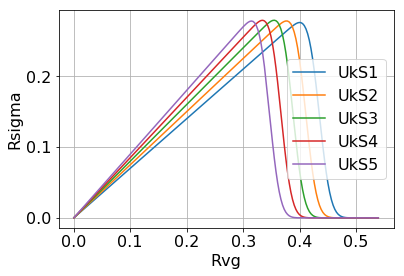

In [22]:
delta = np.linspace(0.4, 0.999,  200)
UkS1 = 0.7
UkS2 = 0.75
UkS3 = 0.8
UkS4 = 0.85
UkS5 = 0.9
n = 1000.0
pc = Pc_psi(U/S)
q = 2.0**16
y7_1 = []
y7_2 = []
y7_3 = []
y7_4 = []
y7_5 = []
y7 = []
x = []
for i in delta:
    y7_1.append(sumrate(n,i,q,UkS1, RVG(i,q)))
    y7_2.append(sumrate(n,i,q,UkS2, RVG(i,q)))
    y7_3.append(sumrate(n,i,q,UkS3, RVG(i,q)))
    y7_4.append(sumrate(n,i,q,UkS4, RVG(i,q)))
    y7_5.append(sumrate(n,i,q,UkS5, RVG(i,q)))
    x.append(RVG(i,q))
    
plt.plot(x, y7_1, label = 'UkS1')
plt.plot(x, y7_2, label = 'UkS2')
plt.plot(x, y7_3, label = 'UkS3')
plt.plot(x, y7_4, label = 'UkS4')
plt.plot(x, y7_5, label = 'UkS5')

#plt.plot(x, y7, 'g--', label = 'derivative of estimation')
plt.grid()
plt.xlabel('Rvg')
plt.ylabel('Rsigma')
plt.legend()
plt.show()

In [23]:
delta = np.linspace(0.4, 0.999,  200)
UkS1 = 0.7
UkS2 = 0.75
UkS3 = 0.8
UkS4 = 0.85
UkS5 = 0.9
n = 1000.0
pc = Pc_psi(U/S)
q = 2.0**16
y7_1 = []
y7_2 = []
y7_3 = []
y7_4 = []
y7_5 = []

for i in delta:
    y7_1.append([sumrate(n,i,q,UkS1, RVG(i,q)), RVG(i,q)])
    y7_2.append([sumrate(n,i,q,UkS2, RVG(i,q)), RVG(i,q)])
    y7_3.append([sumrate(n,i,q,UkS3, RVG(i,q)), RVG(i,q)])
    y7_4.append([sumrate(n,i,q,UkS4, RVG(i,q)), RVG(i,q)])
    y7_5.append([sumrate(n,i,q,UkS5, RVG(i,q)), RVG(i,q)])



In [24]:
a1, b1 = findmax(y7_1,200)
print(a1, b1)
a2, b2 = findmax(y7_2,200)
print(a2, b2)

[0.2757898] [0.39930547]
[0.27794262] [0.37566532]


In [25]:
psi = 1.2
L = 12
q = 2**L
U = np.linspace(10,1000, 100)

In [26]:
 def find0(y,n):
    a1 = 0
    a2 = 0
    for i in range(0,n):
        if y[i][0]>0:
            a1 = y[i][0]
        if y[i][0]<0:
            a2 = y[i][0]
        if (a1>0) & (a2<0):
            return y[i][1]
    return y[0][1]

In [34]:
def findmax(y,n):
    a1 = 0
    a2 = 0
    for i in range(0,n-2):
        a1 = y[i][0]
        a2 = y[i+1][0]
        if a1>a2:
            return y[i][0], y[i][1]
    return y[0][0], y[0][1]

In [28]:
!pip install tqdm

In [29]:
from tqdm import tqdm_notebook

In [30]:
delta = np.linspace(0.4, 0.8, 200)
UkS = np.linspace(0.2,2, 200)
q = 2.0**16
y7_2 = []
y7_21 = []
L=16.
N = np.arange(100,8000,400)
for n in tqdm_notebook(N):
    y7_1 = []
    y7_11 = []
    for u in UkS:
        pc = Pc_psi(u)
        y7=[]
        for i in delta:
            y7.append([opt_func(n,i,q,pc)/1800.,i])
        zero = find0(y7, 100)
        rvg = RVG(float(zero), q)
        #print(zero)
        y7_1.append([sumrate(n, zero, q, u, rvg),u])
        #y7_11.append([sumrate2(n, zero, q, u, rvg),u])
    maxi = findmax(y7_1,100)
    #maxi1 = findmax(y7_11,100)
    y7_2.append(maxi/0.36787)
    #y7_21.append(maxi1)


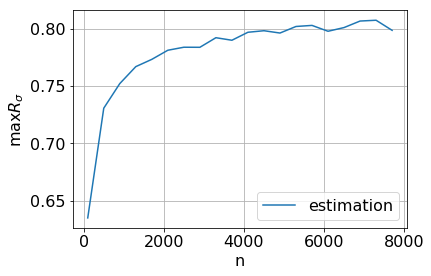

In [164]:
plt.plot(N,y7_2, label = 'estimation')
#plt.plot(N,y7_21, label = 'Rmax')
plt.grid()
plt.xlabel('n')
plt.ylabel('max$R_\sigma$')
plt.legend()

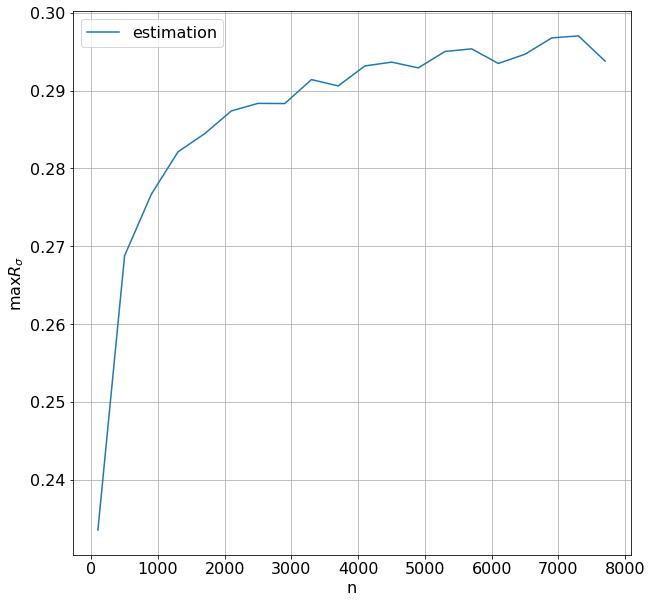

In [36]:

plt.figure(figsize=(10,10))
plt.plot(N,y7_2, label = 'estimation')
#plt.plot(N,y7_21, label = 'Rmax')
plt.xlabel('n')
plt.ylabel('max$R_\sigma$')
plt.grid()
plt.legend()

In [37]:
Q = np.arange(10,2000, 100)

In [38]:
print(u, pc)

2.0 0.8646647167633873


In [39]:
print(Q)

[  10  110  210  310  410  510  610  710  810  910 1010 1110 1210 1310
 1410 1510 1610 1710 1810 1910]


In [40]:
def derR(xi,p):
    return math.exp(-xi)*(1-p/2/np.log([2]))*(1-xi)+math.exp(-xi*p)*p/2/np.log([2])*(1-p*xi)

In [63]:
def C(xi, p):
    return math.exp(-xi)*(1-p/2/np.log([2]))+math.exp(-xi*p)*p/2/np.log([2])

In [42]:
xi = np.linspace(0+1e-3, 5, 200)
Rotxi1 = []
Rotxi2 = []
Rotxi3 = []
p1=0.2
p2=0.5
p3 = 0.8
for i in xi:
    Rotxi1.append(i*C(i,p1))
    Rotxi2.append(i*C(i,p2))
    Rotxi3.append(i*C(i,p3))

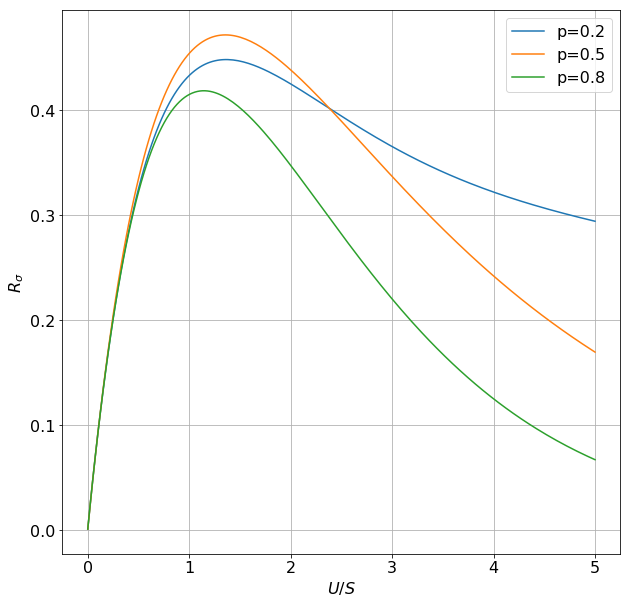

In [43]:
plt.figure(figsize=(10,10))
plt.plot(xi,Rotxi1, label = 'p=0.2')
plt.plot(xi,Rotxi2, label = 'p=0.5')
plt.plot(xi,Rotxi3, label = 'p=0.8')
plt.xlabel('$U/S$')
plt.ylabel('$R_\sigma$')
plt.grid()
plt.legend()

In [44]:
p = np.linspace(0+1e-3, 1-1e-3, 200)
Rotp1 = []
Rotp2 = []
Rotp3 = []
xi1=1.
xi2=1.2
xi3 = 1.5
for i in p:
    Rotp1.append(xi1*C(xi1,i))
    Rotp2.append(xi2*C(xi2,i))
    Rotp3.append(xi3*C(xi3,i))

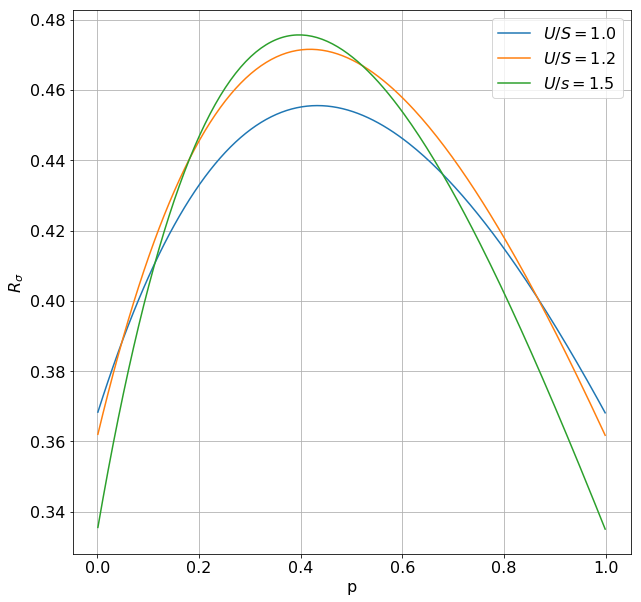

In [45]:
plt.figure(figsize=(10,10))
plt.plot(p,Rotp1, label = '$U/S=1.0$')
plt.plot(p,Rotp2, label = '$U/S=1.2$')
plt.plot(p,Rotp3, label = '$U/s=1.5$')
plt.xlabel('p')
plt.ylabel('$R_\sigma$')
plt.grid()
plt.legend()

In [46]:
p = np.linspace(0+1e-3, 1-1e-3, 800)
xi = np.linspace(0+1e-3, 5, 800)
xiotp = []

Rotp3 = []
xi1=1.
xi2=1.2
xi3 = 1.5
for i in p:
    derotp = []
    for j in xi:
        derotp.append([derR(j,i), j])
    zer = find0(derotp, 800)
    
    xiotp.append(zer)

No handles with labels found to put in legend.


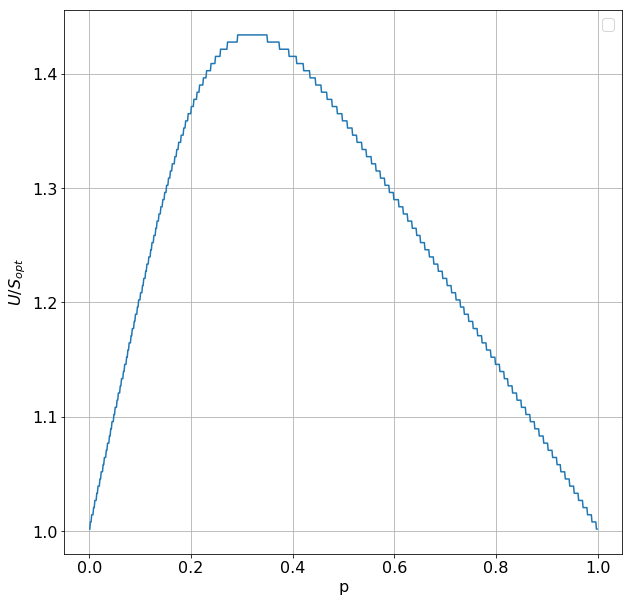

In [47]:
plt.figure(figsize=(10,10))
plt.plot(p,xiotp)
plt.xlabel('p')
plt.ylabel('$U/S_{opt}$')
plt.grid()
plt.legend()

In [158]:
p=0.5
xi = np.linspace(0+1e-3, 5, 200)
Rsig1 = []
Rsig2 = []
Rsig3 = []
q = 2**20
n=200
dlt = 0.68
rvg = RVG(dlt,q)
for i in xi:
    Rsig1.append(i*C(i,p))
    Rsig2.append(sumrate3(n, dlt, q, i, rvg))
    Rsig3.append(sumrate(n, dlt, q, i, rvg))

0.001 [0.27478097] 0.999999999999999
0.026120603015075378 [0.27478097] 0.9999999999999999
0.051241206030150754 [0.27478097] 1.0
0.07636180904522613 [0.27478097] 1.0000000000000004
0.10148241206030151 [0.27478097] 0.9999999999999993
0.12660301507537688 [0.27478097] 0.9999999999999998
0.15172361809045226 [0.27478097] 1.0
0.17684422110552764 [0.27478097] 1.0000000000000002
0.20196482412060301 [0.27478097] 0.9999999999999999
0.2270854271356784 [0.27478097] 1.0
0.25220603015075377 [0.27478097] 0.9999999999999996
0.2773266331658292 [0.27478097] 1.0000000000000004
0.3024472361809045 [0.27478097] 1.0000000000000004
0.32756783919597987 [0.27478097] 1.0000000000000002
0.3526884422110553 [0.27478097] 1.0000000000000002
0.3778090452261307 [0.27478097] 1.0
0.40292964824120603 [0.27478097] 1.0000000000000007
0.4280502512562814 [0.27478097] 1.0
0.4531708542713568 [0.27478097] 0.9999999999999996
0.4782914572864322 [0.27478097] 1.0000000000000002
0.5034120603015075 [0.27478097] 0.9999999999999997
0.528

4.497587939698493 [0.27478097] 8.734669115075569e-75
4.522708542713568 [0.27478097] 1.7710620241569582e-75
4.5478291457286435 [0.27478097] 3.587707652711825e-76
4.572949748743719 [0.27478097] 7.26116847574377e-77
4.598070351758794 [0.27478097] 1.4682909902356615e-77
4.62319095477387 [0.27478097] 2.966494959456288e-78
4.648311557788945 [0.27478097] 5.988394637958837e-79
4.673432160804021 [0.27478097] 1.207874301879007e-79
4.698552763819095 [0.27478097] 2.4343699447591777e-80
4.723673366834171 [0.27478097] 4.902455573715302e-81
4.748793969849246 [0.27478097] 9.865328041883637e-82
4.773914572864322 [0.27478097] 1.9837570050171712e-82
4.799035175879397 [0.27478097] 3.986140334821275e-83
4.824155778894473 [0.27478097] 8.004086015847557e-84
4.849276381909548 [0.27478097] 1.6061039257560664e-84
4.874396984924624 [0.27478097] 3.2206665236722575e-85
4.899517587939699 [0.27478097] 6.454095508596861e-86
4.9246381909547745 [0.27478097] 1.2925568030503233e-86
4.94975879396985 [0.27478097] 2.5869940

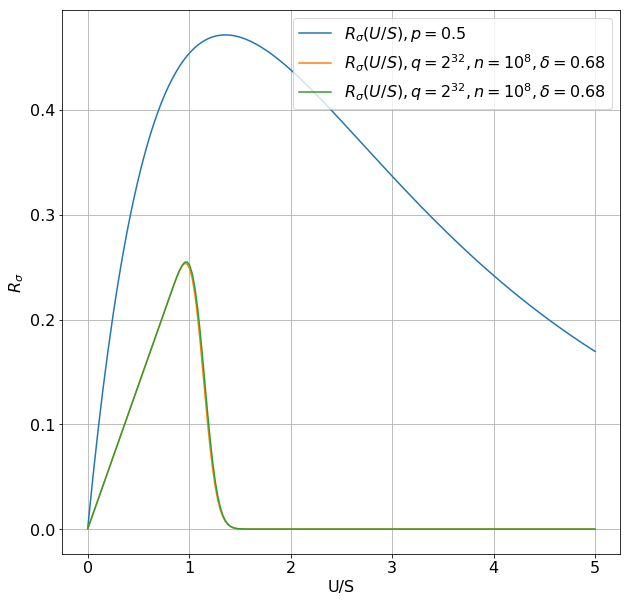

In [159]:
plt.figure(figsize=(10,10))
plt.plot(xi,Rsig1, label = '$R_\sigma(U/S), p=0.5$')
plt.plot(xi,Rsig2, label = '$R_\sigma(U/S), q=2^{32},n=10^8,\delta=0.68$')
plt.plot(xi,Rsig3, label = '$R_\sigma(U/S), q=2^{32},n=10^8,\delta=0.68$')
plt.xlabel('U/S')
plt.ylabel('$R_\sigma$')
plt.grid()
plt.legend()

In [51]:
rvg = RVG(0.68, 2**32)

In [52]:
rvg

array([0.29173808])

In [141]:
def sumrate3(n, delta, q, psi, rvg):
    pcorr_log = 0
    pcorr = 0
    pc  = Pc_psi(psi)
    
    d = math.ceil(delta*n)
    
    for i in range(0,int(d)):
        ans = 1
        for j in range(1, i+1):
            ans = ans*pc*i/10.
        #print(ans, '1')
        for j in range(i+1, n+1):
            ans = ans*(1-pc)*10.
        #print(ans, '2')
        for j in range(1, i+1):
            ans = ans/i*10.
        for j in range(i+1, n+1):
            ans = ans*j/(j-i)/10.
        #print(ans, '3')
        pcorr = pcorr + ans
        #if(pc**i == 0):
            #print(pc, i, 'pc i')
        #if((1-pc)**(n-i) == 0):
            #print(1-pc, n-i, '1-pc ni')
        #print('secret', binom(int(n),i), pc**i, pcorr, (1-pc)**(n-i))
    print(psi,rvg,pcorr)
    return psi*rvg*pcorr

In [148]:
math.factorial(10)

3628800